# Decision tree using company data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.shape

(400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
#Sales have max value 16.2 and min value is 0.00
#Sales value is 7.49 upto 50%

In [9]:
nan_in_df = df.isnull().sum().sum()
nan_in_df

0

In [10]:
df_dub= df.copy()

In [11]:
df_dub['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [12]:
df_dub['Sales'].sort_values().unique()

array([ 0.  ,  0.16,  0.37,  0.53,  0.91,  1.42,  1.82,  2.05,  2.07,
        2.23,  2.34,  2.52,  2.66,  2.67,  2.86,  2.93,  2.99,  3.02,
        3.07,  3.13,  3.15,  3.24,  3.42,  3.45,  3.47,  3.58,  3.62,
        3.63,  3.67,  3.72,  3.89,  3.9 ,  3.91,  3.98,  4.1 ,  4.11,
        4.12,  4.15,  4.16,  4.17,  4.19,  4.2 ,  4.21,  4.34,  4.36,
        4.38,  4.42,  4.43,  4.47,  4.53,  4.55,  4.56,  4.62,  4.67,
        4.68,  4.69,  4.74,  4.78,  4.81,  4.83,  4.88,  4.9 ,  4.94,
        4.95,  4.96,  4.97,  4.99,  5.01,  5.04,  5.05,  5.07,  5.08,
        5.12,  5.16,  5.17,  5.21,  5.25,  5.27,  5.28,  5.3 ,  5.31,
        5.32,  5.33,  5.35,  5.36,  5.4 ,  5.42,  5.47,  5.52,  5.53,
        5.55,  5.56,  5.57,  5.58,  5.61,  5.64,  5.68,  5.71,  5.73,
        5.74,  5.81,  5.83,  5.86,  5.87,  5.9 ,  5.93,  5.94,  5.97,
        5.98,  5.99,  6.01,  6.03,  6.1 ,  6.11,  6.14,  6.15,  6.18,
        6.2 ,  6.23,  6.37,  6.38,  6.39,  6.41,  6.42,  6.43,  6.44,
        6.5 ,  6.52,

In [13]:
df_dub['bins'] = pd.cut(x=df['Sales'], bins=[0,9,18], 
                       labels = ["LOW" , "HIGH"])

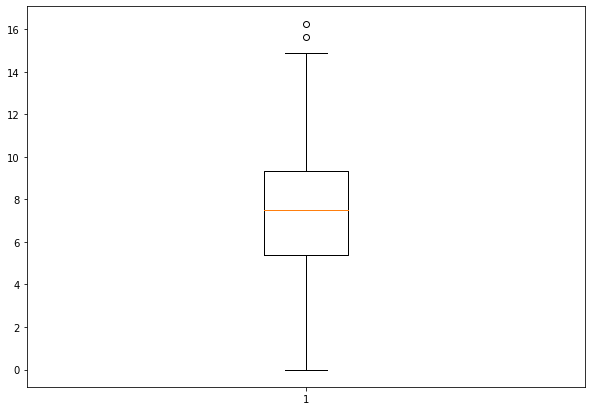

In [14]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_dub['Sales'])
 
# show plot
plt.show()

In [15]:
#15.63 and 16.27 these are the outlier here  so drop those recored

In [16]:
#But it shows high sale so we can't removed it

In [17]:
df_dub

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,bins
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,HIGH
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,HIGH
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,HIGH
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,LOW
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,HIGH
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,LOW
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,LOW
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,LOW


In [18]:
obj_df = df_dub.select_dtypes(include=['object']).copy()
obj_df.head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [19]:
#apply label encoder on categorical data

In [20]:
le = preprocessing.LabelEncoder()
df1 = obj_df.apply(le.fit_transform)

In [22]:
df_dub = df_dub.drop(['ShelveLoc','Urban','US','Sales'],axis = 1)

In [23]:
df_dub['ShelveLoc'] = df1['ShelveLoc']
df_dub['Urban'] = df1['Urban']
df_dub['US'] = df1['US']

In [24]:
df_dub

,CompPrice,Income,Advertising,Population,Price,Age,Education,bins,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,HIGH,0,1,1
1,111,48,16,260,83,65,10,HIGH,1,1,1
2,113,35,10,269,80,59,12,HIGH,2,1,1
3,117,100,4,466,97,55,14,LOW,2,1,1
4,141,64,3,340,128,38,13,LOW,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,HIGH,1,1,1
396,139,23,3,37,120,55,11,LOW,2,0,1
397,162,26,12,368,159,40,18,LOW,2,1,1
398,100,79,7,284,95,50,12,LOW,0,1,1


In [25]:
df_dub.isnull().values.any()

True

In [26]:
df_dub["bins"].mode()

0    LOW
Name: bins, dtype: category
Categories (2, object): ['LOW' < 'HIGH']

In [27]:
# replacing na values
df_dub["bins"].fillna("LOW", inplace = True)
  


In [28]:
df_dub.isnull().values.any()

False

In [29]:
#df_dub['Sales'].sort_values().unique()

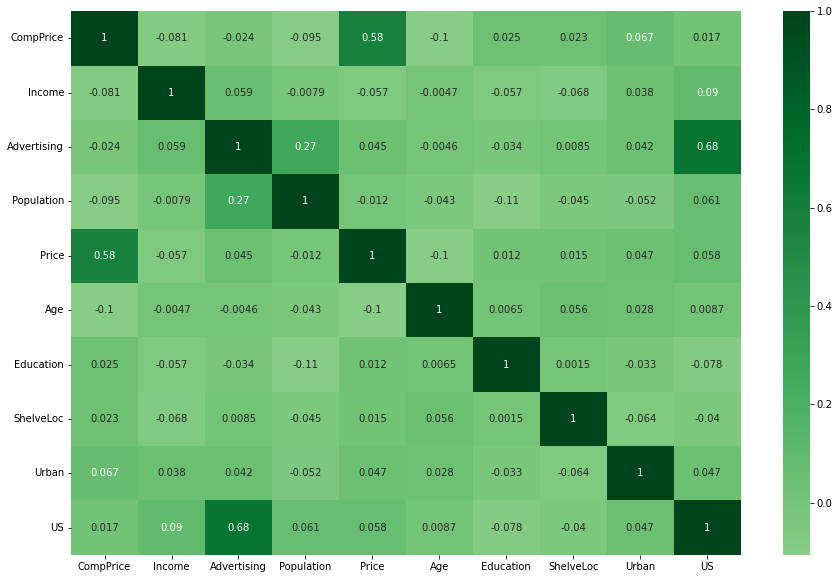

In [30]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df_dub.corr(),annot = True, cmap = 'Greens', center = 0)
plt.show()

In [31]:
#A high positive correlation of 0.68 is observed

In [32]:

#df_dub['bins'].fillna(df_dub['bins'].mode(), inplace=True)

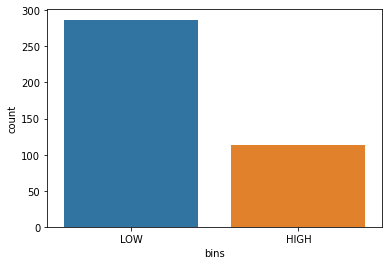

In [33]:
sns.countplot(data = df_dub, x = 'bins')
plt.show()

In [34]:
x=df_dub.drop(['bins'],axis = 1)
y=df_dub['bins']

In [35]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [36]:
y

0      HIGH
1      HIGH
2      HIGH
3       LOW
4       LOW
       ... 
395    HIGH
396     LOW
397     LOW
398     LOW
399    HIGH
Name: bins, Length: 400, dtype: category
Categories (2, object): ['LOW' < 'HIGH']

In [37]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [38]:
y.isna().sum()

0

#  Feature Extraction

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
#improve accuracy apply feature extraction
#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Fets','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))

          Fets       Score
4        Price  222.047033
2  Advertising  219.011623
3   Population  100.372679
1       Income   74.899100
5          Age   65.574438
9           US    6.986965
6    Education    0.730884
7    ShelveLoc    0.170587


In [41]:
final_X = x[[ 'Income', 'Advertising','Population','Price','Age','Education','Education','ShelveLoc','US']]

In [42]:
#,'ShelveLoc'#'CompPrice',

In [43]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(final_X,y, test_size=0.25 , random_state = 0)

# Building Decision Tree Classifier Default Parameter

In [44]:
#lets run on default parameter
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

In [45]:
model = model1.fit(x_train, y_train)

In [46]:
from sklearn.model_selection import cross_val_score
print('Score: ', model1.score(x_train, y_train))
print('Cross validation score, 10-fold cv: \n', cross_val_score(model1, x_train, y_train, cv=10)) 
print('Mean cross validation score: ', cross_val_score(model1,x_train,y_train,cv=10).mean())

Score:  1.0
Cross validation score, 10-fold cv: 
 [0.7        0.7        0.9        0.73333333 0.76666667 0.56666667
 0.76666667 0.86666667 0.83333333 0.7       ]
Mean cross validation score:  0.7666666666666666


In [47]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

LOW     69
HIGH    31
dtype: int64

In [48]:
pd.crosstab(y_test,preds)

col_0,HIGH,LOW
bins,,
LOW,15,52
HIGH,16,17


In [49]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with default  index: {0:0.4f}'. format(accuracy_score(y_test, preds)))

Model accuracy score with default  index: 0.6800


# Grid SearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini', 'entropy'],
              'max_depth' : [1,2,3,4,5, 6, 7, 8, 9],              
              'max_leaf_nodes':[1,2,3,4,5,6]
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid= param_grid,cv = 10 , verbose=True)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DEL

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6]},
             verbose=True)

In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features='sqrt', max_leaf_nodes=5)

In [52]:
grid_search.best_score_

0.79

In [53]:
parameters = grid_search.best_params_

# Final Model DT

In [54]:
#lets run on final  parameter
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=6)

In [55]:
#Using entropy we can build best model.

In [56]:
final_model = dt.fit(x_train , y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [57]:
#Predicting on test data
preds = final_model.predict(x_test)  
pd.Series(preds).value_counts()

LOW     71
HIGH    29
dtype: int64

In [58]:
pd.crosstab(y_test,preds)

col_0,HIGH,LOW
bins,,
LOW,16,51
HIGH,13,20


In [59]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))

Model accuracy score: 0.6400


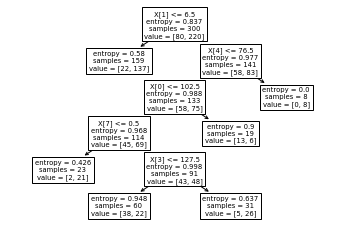

In [60]:
#PLot the decision tree
tree.plot_tree(final_model);

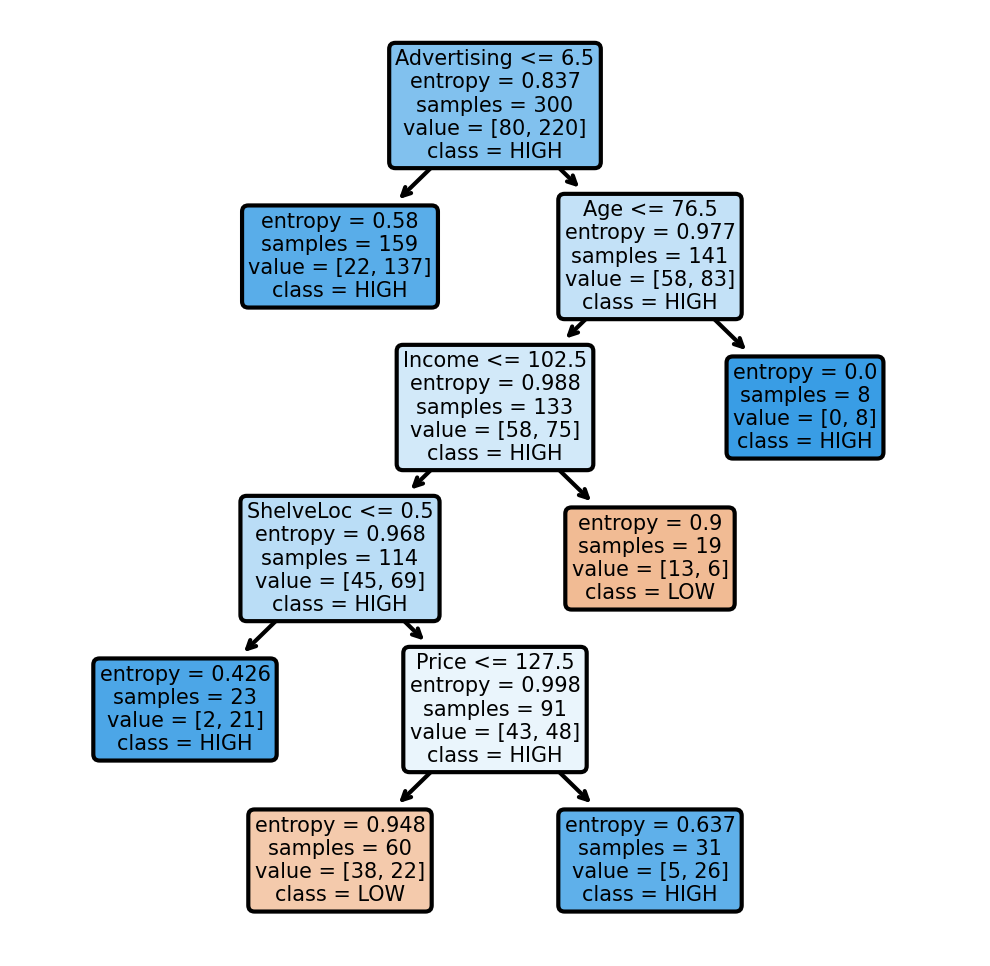

In [61]:
fn=['Income', 'Advertising','Population','Price','Age','Education','Education','ShelveLoc','US']
cn=['LOW','HIGH']
fig, axes = plt.subplots(nrows = 1 ,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(final_model,
               feature_names = fn, 
               class_names=cn,
               rounded=True, 
               fontsize=5,
               filled = True);

In [62]:
#So this are the segment or attributes causes high sale for cloth manufacturing company 